In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
# import warnings
## warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
m = Base.classes.measurement
s = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
mst_rec_date = session.query(func.max(m.date)).first()
mst_rec_date

('2017-08-23',)

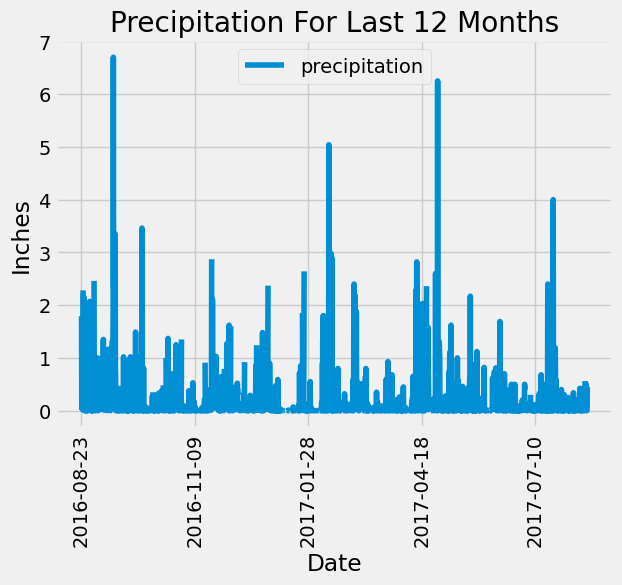

<Figure size 700x700 with 0 Axes>

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_yr = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(m.date, m.prcp).filter(m.date >= prev_yr).all()
#results = session.query(m.date, m.prcp)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_precip = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df_precip = df_precip.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df_precip.plot(x='date', y='precipitation', rot=90)

# Setting labels and title for bar graph
plt.title("Precipitation For Last 12 Months")
plt.xlabel("Date")
plt.ylabel("Inches")

# Save the bar graph
plt.savefig("Images/bargraph-1.png")

# Set bar graph size
plt.figure(figsize=(7, 7))

# display the bar graph
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_precip.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
query_stations = session.query(m).group_by(m.station).count()
print(query_stations)

9


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
query_act_stations = session.query(m.station, func.count(m.station)).\
                     group_by(m.station).\
                     order_by(func.count(m.station).desc()).all()
query_act_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [ ]:
# Close Session
session.close()